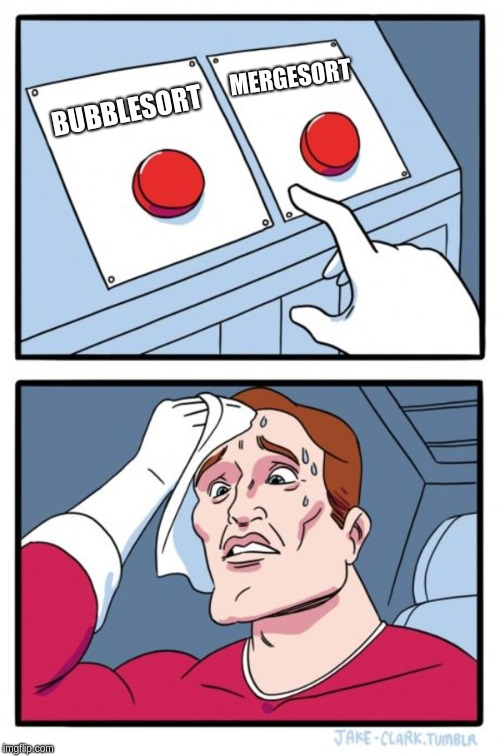

In [1]:
from IPython.display import Image
Image("logo_mem.jpg")

# Оцениваем эффективность алгоритмов

Хей хей, ребята!
Сегодня будем учиться оценивать эффективность алгоритмов, напримере алгоритмов сортировки (такой подход оценки эффективности не самый удачный, но он очень наглядный). В дальнейшем, можете пользоваться таким подходом для сравнения любых других алгоритмов.

## Для начала освоим несколько дополнительных инструментов 

0) Нам надо научиться генерировать тестовые сэмплы

0.1) Вспомнить прошлое занятие

1) Нам нужно научиться делать временные замеры

2) Нужно немного порисовать графики

3) Сделаем сквозные тестирования

## 0) Генерация случайного сэмпла

Давайте сделаем небольшой тестовый лист, длины 50, заполненный случайными числами в диапазоне от 1 до 100.

Для этого воспользуемся библиотекой random 

In [2]:
import random

test_sample = random.sample(range(1,100), 50)   #range(1,100) - наш диапазон, 50 - длина сэмпла
print(test_sample[:20]) #Посмотрим на первые 20

[14, 47, 41, 66, 33, 30, 4, 93, 32, 97, 13, 88, 36, 38, 5, 52, 25, 96, 75, 50]


### Хм

Довольно случайно, неплохо.

Давайте напишем функцию, которая будет нам генерировать словарь следующего содержания:

словарь = {желаемая длина словаря (число) : сэмпл (лист)}

In [3]:
def rand_list_generator(dict_sample, len_of_rand_list):
    dict_sample[len_of_rand_list] = random.sample(range(len_of_rand_list*1000), len_of_rand_list)
    return dict_sample

In [4]:
# Протестируем
# Посмотрим, что вернет эта функция при следующих параметрах
# 1) Создадим пустой словарь, который будем передавать в качестве первого аргумента нашей функции
empty_dict = {}
# 2) Хотим случайный сэмпл длины 20
len_of_sample = 20


test_obj = rand_list_generator(empty_dict, len_of_sample)
print(test_obj)
print(type(test_obj))


{20: [11656, 2036, 6968, 5485, 2967, 3017, 14681, 416, 11139, 11443, 19345, 19699, 5645, 3433, 6095, 4635, 9645, 7227, 9050, 375]}
<class 'dict'>


## Отлично, оно работает
Как видим, ключом в этом словаре является длина сэмпла, значением - лист случайных чисел.

Движемся дальше

# Вспоминаем бытие

Помними рекурсию? А что такое факториал?

Напомню - рекурсивный вызов функции - это такой вызов, когда функция внутри себя вызывает саму себя.

Пример:


In [5]:
def rec_example(n):
    if n == 0:
        return 1
    print(n)
    return rec_example(n-1)

rec_example(10)



10
9
8
7
6
5
4
3
2
1


1

### Похоже на циклы, не правда ли?
Давайте напишем то же самое при помощи цикла for

In [6]:
for i in range(10,0,-1):
    print(i)

10
9
8
7
6
5
4
3
2
1


### Убедительно

Давайте выясним, что работает быстрее?

Для этого, нам нужна библиотека time

Время выполнения программы с ее помощью оценивают следующим образом:



In [8]:
import time

start_time = time.time() # Начальный момент времени
#....
#....
#..\code\...
#......
#....
all_time = time.time() - start_time # Текущий момент времени минус начальный
print(all_time)

8.916854858398438e-05


Давайте немного изменим прошлую функцию (уберем print),
и посмотрим, что быстрее на пустом выполнении.


А после - почитайте полезуню статью --- https://stackoverflow.com/questions/3323001/what-is-the-maximum-recursion-depth-in-python-and-how-to-increase-it






In [21]:
iterations = 100 # Количество итераций

start_time = time.time()
for i in range(iterations,0, -1):
    pass                       # пропускаем шаг и ничего не делаем
all_time = time.time() - start_time

print('Execution time for loop: ', all_time)


def rec_example(n):
    if n  <  1:
        return 1               # аналогично
    return rec_example(n-1)


new_start_time = time.time()

rec_example(iterations)

new_all_time = time.time() - new_start_time
print('Execution time for recursion: ', new_all_time)

Execution time for loop:  0.00019431114196777344
Execution time for recursion:  0.0001938343048095703


Что же получается? По времени вышел примерно одинаковый результат.

Давайте немного изменим код, а именно - добавим простое арифметическое действие

In [24]:
iterations = 200 # Количество итераций

start_time = time.time()
for i in range(iterations,0, -1):
    q = i*i*i                     # вычисляем куб переменной цикла
all_time = time.time() - start_time

print('Execution time for loop: ', all_time)


def rec_example(n):
    if n  <  1:
        return 1               # аналогично
    s = n*n*n
    return rec_example(n-1)


new_start_time = time.time()

rec_example(iterations)

new_all_time = time.time() - new_start_time
print('Execution time for recursion: ', new_all_time)

Execution time for loop:  0.00030994415283203125
Execution time for recursion:  0.0003204345703125


# Проигрыш

Что же выходит - циклы лучше рекурсии?

Давайте разберемся. 



# Задание #1

Реализовать рекурсивное вычисление факториала, а также его вычисление в цикле

Напомню - факториалом числа N называют следующий объект:

$N! = N\cdot(N-1)\cdot(N-2)\cdot(N-3)...\cdot1$

### Посчитаем факториал, до числа 30

Поверьте, это достаточно большое число

In [30]:

def loop_factorial(number):
    factor = 1
    for i in range(1, number + 1):
        factor = factor * i
    return factor

for i in range(1,30):
    print("factorial of ", i, " is ", loop_factorial(i))

factorial of  1  is  1
factorial of  2  is  2
factorial of  3  is  6
factorial of  4  is  24
factorial of  5  is  120
factorial of  6  is  720
factorial of  7  is  5040
factorial of  8  is  40320
factorial of  9  is  362880
factorial of  10  is  3628800
factorial of  11  is  39916800
factorial of  12  is  479001600
factorial of  13  is  6227020800
factorial of  14  is  87178291200
factorial of  15  is  1307674368000
factorial of  16  is  20922789888000
factorial of  17  is  355687428096000
factorial of  18  is  6402373705728000
factorial of  19  is  121645100408832000
factorial of  20  is  2432902008176640000
factorial of  21  is  51090942171709440000
factorial of  22  is  1124000727777607680000
factorial of  23  is  25852016738884976640000
factorial of  24  is  620448401733239439360000
factorial of  25  is  15511210043330985984000000
factorial of  26  is  403291461126605635584000000
factorial of  27  is  10888869450418352160768000000
factorial of  28  is  30488834461171386050150400000

## Самостоятельно 

Реализуйте то же самое, но только при помощи рекурсии

In [76]:
def recursion_factorial(number):
    #.....
    #.....твой код
    #.....

    return #.......

Затем столкните их при вычислении факториала 500 (это очень много) (попробуйте вычислить это на обычном калькуляторе)


In [82]:
time_for_loop_start = time.time()
loop_factorial(500)
finish_loop = time.time() -time_for_loop_start

time_recursion_start = time.time()
recursion_factorial(500)
finish_recursion = time.time() - time_recursion_start


print('Time of execution ForLoop factorial function: ', finish_loop)
print('Time of execution Recursion factorial function: ', finish_recursion)

Time of execution ForLoop factorial function:  0.0005195140838623047
Time of execution Recursion factorial function:  0.0010576248168945312


# Ответ на данное задание

В гугл форме (прикрепленной в конце тетрадки) нужно отметить, какой способ быстрее - рекурсивный или циклический

### Теперь немного порисуем

В питоне можно рисовать графики. Удивительно, правда?

Для этого придумали специальную библиотеку, которая зовется matplotlib

Давайте покажу небольшой примерчик, как ее использовать (подробнее про нее можно почитать тут https://matplotlib.org/)


In [60]:
import matplotlib.pyplot as plt   # импортируем 
plt.rcParams["figure.figsize"] = (14,10)   # сразу изменим размер отображаемых графиков 

In [41]:
X = [1,2,3,4,5,6,7,8]  # По оси X возьмем эти значения
Y = []
for i in X:                    # По оси Y возьмем квадраты от X, т.е. Y = X^2
    Y.append(i**2)


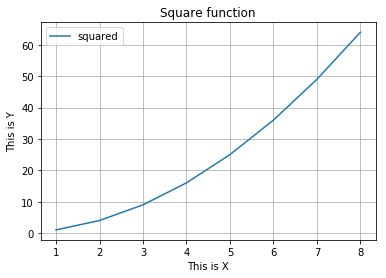

In [43]:
plt.plot(X,Y, label = 'squared') #На первой позиции стоит то, отображается по оси X; label - метка для легенды
plt.title('Square function')  # Название графика (отображается сверху)
plt.xlabel('This is X') # Подпись к оси X
plt.ylabel('This is Y') # Подпись к оси Y
plt.grid(True) # Включает сетку (попробуйте написать False)
plt.legend() # Легенда - мелкое окошко, которое показывает, какая кривая чему соответствует (отображет то, что кроется в label)
plt.show() # Отображает ваш графи в отдельном окне

 Чтобы нарисовать несколько графиков на одном полотне, делаем так

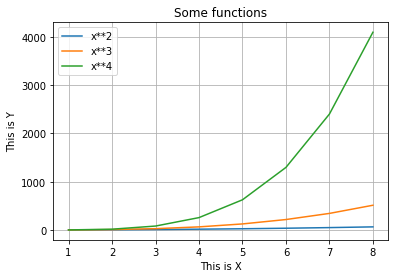

In [44]:
X = [1,2,3,4,5,6,7,8]  # По оси X возьмем эти значения
Y_2 = []
Y_3 = []
Y_4 = []
for i in X:                    # По оси Y возьмем квадраты от X, т.е. Y = X^2
    Y_2.append(i**2) # Квадрат Х
    Y_3.append(i**3) # Куб Х
    Y_4.append(i**4) # 4-ая степень X
    
    
plt.plot(X,Y_2, label = 'x**2') # Рисуем первый график на полотне
plt.plot(X,Y_3, label = 'x**3') # На том же полотне рисуем второй и тд
plt.plot(X,Y_4, label = 'x**4')
plt.title('Some functions')  # Название графика (отображается сверху)
plt.xlabel('This is X') # Подпись к оси X
plt.ylabel('This is Y') # Подпись к оси Y
plt.grid(True) # Включает сетку (попробуйте написать False)
plt.legend() # Легенда - мелкое окошко, которое показывает, какая кривая чему соответствует (отображет то, что кроется в label)
plt.show() # Отображает ваш графи в отдельном окне


# Теперь мы во все оружии
Перед началом рекомендую открыть книжку Кормена (Алгоритмы: построение и анализ) и почитать про сложноть алгоритмов. 

## Задача #2

Выяснить, какой алгоритм из преставленных - самый быстрый.

Решаем задачу следующим образом:

1)Делаем словарь тестовых сэмплов со случайными числами

2)Создаем функции, сортирующие наши сэмплы и засекаем время работы каждого

3)Строим график для каждого в координатах (X = длина сэмпла, Y = время его сортировки)


Поясню на примере:




In [59]:
def rand_list_generator(dict_sample, len_of_rand_list):
    dict_sample[len_of_rand_list] = random.sample(range(len_of_rand_list*1000), len_of_rand_list)
    return dict_sample


len_list = []
for i in range(1, 16):          # Создаем лист , длин наших сэплов, то есть 
    len_list.append(2**i)       # хотим сэмплы длины 2,4,8,16 и т.д до 2^15 .
    
test = {}

for j in len_list:              # Создаем эти сэмплы и помещаем их в словарь
    rand_list_generator(test, j)

In [48]:
print(test[2], test[4], test[16]) # посмотрим на наш словарь по ключам 2,4,16

[1650, 1636] [1964, 584, 1049, 2815] [15679, 6843, 7241, 4384, 14054, 4547, 7828, 13087, 3317, 1451, 2343, 486, 2360, 8559, 6062, 1640]


### Отлично
Давайте теперь испытаем стандартный метод сортировки в python , который вызывается как .sort()

In [49]:
test1 = test  # Создадим копию словаря и с ней работаем в этом примере, в то время как test остается без изменений
counter_dict = {}   # словарь типа {длина_сортируемого_сэмпла: время_сортировки}

for key, val in test1.items():                 # Вспоминаем занятие по словарям
    start_time = time.time()
    test1[key].sort()
    counter_dict[key] = time.time() - start_time

С библиотекой tqdm это будет выглядеть так (если ее нет, в консоли пишем pip install tqdm):


In [50]:
from tqdm import tqdm 

In [51]:
test1 = test  # Создадим копию словаря и с ней работаем в этом примере, в то время как test остается без изменений
counter_dict = {}   # словарь типа {длина_сортируемого_сэмпла: время_сортировки}

for key, val in tqdm(test1.items()):                 # Оборачиваем tqdm-ом 
    start_time = time.time()
    test1[key].sort()
    counter_dict[key] = time.time() - start_time

100%|██████████| 15/15 [00:00<00:00, 1405.69it/s]


Смотрим, что внутри

In [52]:
counter_dict

{2: 6.4373016357421875e-06,
 4: 3.337860107421875e-06,
 8: 1.9073486328125e-06,
 16: 2.384185791015625e-06,
 32: 4.0531158447265625e-06,
 64: 6.9141387939453125e-06,
 128: 9.298324584960938e-06,
 256: 1.9073486328125e-05,
 512: 6.365776062011719e-05,
 1024: 7.486343383789062e-05,
 2048: 0.00015616416931152344,
 4096: 0.0005228519439697266,
 8192: 0.0010919570922851562,
 16384: 0.0024302005767822266,
 32768: 0.005406379699707031}

# Теперь задание
Рассмотреть алгоритмы bubbleSort, selectionSort, insertionSort, mergeSort (все реализации найдете тут http://interactivepython.org/runestone/static/pythonds/SortSearch/TheBubbleSort.html и по стрелке вправо)

И ответить на вопрос, какой из них самый эффективный?

Ход решения должен быть следующим:

In [54]:
def bubbleSort(alist):
    #.....твой код
    #......
    #.......
                
    return alist


test2 = test # пустышка для bubbleSort
counter_dict_bubble = {} # словарь для bubbleSort

for key, val in test2.items():
    start_time = time.time()
    bubbleSort(test2[key])
    counter_dict_bubble[key] = time.time() - start_time

In [55]:
def selectionSort(alist):
    #.....твой код
    #......
    #.......
    return alist

test3 = test
counter_dict_select = {}

for key, val in tqdm(test3.items()):
    #........твой код

100%|██████████| 15/15 [03:22<00:00, 52.39s/it]


In [56]:
def insertionSort(alist):
    #.....твой код
    #......
    #.......
        
    return alist

#Хех

100%|██████████| 15/15 [00:00<00:00, 298.63it/s]


In [57]:
def mergeSort(alist):
    #.....твой код
    #......
    #.......
            
    return alist

# Тут должно быть что-то, но что?Оо

100%|██████████| 15/15 [00:00<00:00, 19.17it/s]


# Не забываем
Что test1 уже получен при помощи метода .sort()

Теперь давайте отобразим все наглядно (по оси Y возьмем логарифмический масштаб при помощи plt.semylogy)

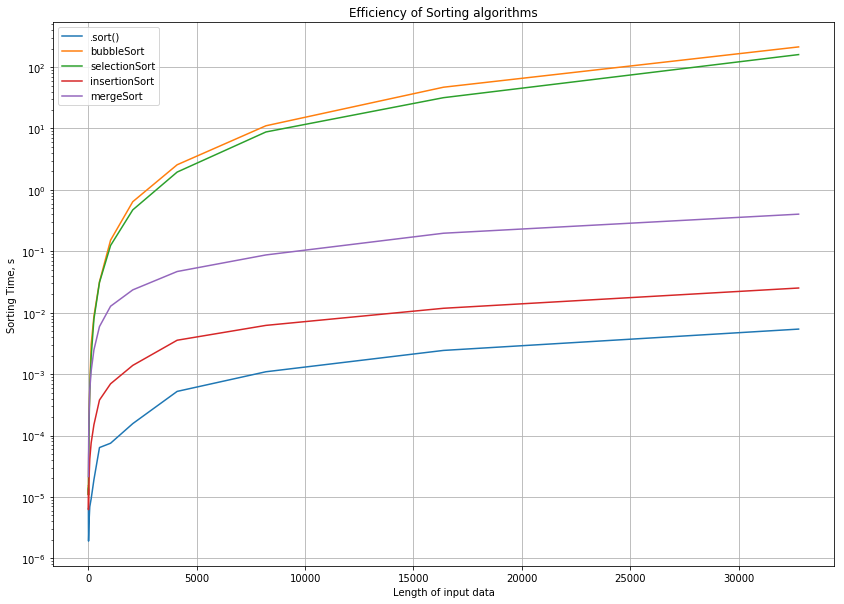

In [61]:
plt.semilogy(counter_dict.keys(), counter_dict.values(), label ='.sort()')
plt.semilogy(counter_dict_bubble.keys(), counter_dict_bubble.values(), label = 'bubbleSort')
plt.semilogy(counter_dict_select.keys(), counter_dict_select.values(), label = 'selectionSort')
plt.semilogy(counter_dict_insert.keys(), counter_dict_insert.values(), label = 'insertionSort')
plt.semilogy(counter_dict_merge.keys(), counter_dict_merge.values(), label = 'mergeSort')

plt.grid(True)
plt.title('Efficiency of Sorting algorithms')
plt.xlabel('Length of input data')
plt.ylabel('Sorting Time, s')
plt.legend()
plt.show()

# Ответ на это задание 
В гугл форме укажи название двух самых худших алгоримтов ( с самым большим временем)

# Задание #3 
Проанализируй результаты и оцени значение длины массива, до которой не имеет значение, какой алгоритм использовать (время исполнения примерно одинаково)

Подскажу - разверни графики через plt.plot() , а не plt.semilogy()

В ответе на задание - выбери в гугл форме то число, что ближе всего к твоим предположениям

# Задание #4

Какой самый лучший исход для наших алгоритмов? Правильно  - когда им на вход уже дается отсортированный массив,
тогда они просто проносятся через функции и все.

Давайте смоделируем худший случай - подадим на вход алгоритмам массивы, отсортированные задом-наперед, то есть, если наши алгоритмы сортируют по возрастанию (от 1 до over9000), то мы подадим им на вход массив, отсортированный
в порядке от over9000 до 1.

В ответе в гугл форме напиши - какой алгоритм справился хуже всего.


Подсказка: 

In [66]:
test_reverse = test   

for key, val in test_reverse.items():                 #Делаем новую привязку для сортировки в обратном порядке
    test_reverse[key].sort(reverse = True)

In [68]:
test_reverse[2],test_reverse[4]  # Как видим, все хорошо

([1733, 1709], [3845, 3180, 2400, 1200])

Теперь повторим блоки (о великая сила копи-пасты!!)

In [73]:
test1_reverse = test_reverse 
counter_dict_reverse = {} 

for key, val in test1_reverse.items():
    start_time = time.time()
    test1_reverse[key].sort()
    counter_dict_reverse[key] = time.time() - start_time

In [69]:
test2_reverse = test_reverse # пустышка для bubbleSort в обратном порядке
counter_dict_bubble_reverse = {} # новый словарь для bubbleSort 

for key, val in test2_reverse.items():
#..........
#..........
#...... код

In [70]:
test3_reverse = test_reverse 
counter_dict_select_reverse = {} 

#.....вжух

In [71]:
test4_reverse = test_reverse 

#.....
#.....
#.......
#.......

In [72]:
test5_reverse = test_revers

#..........

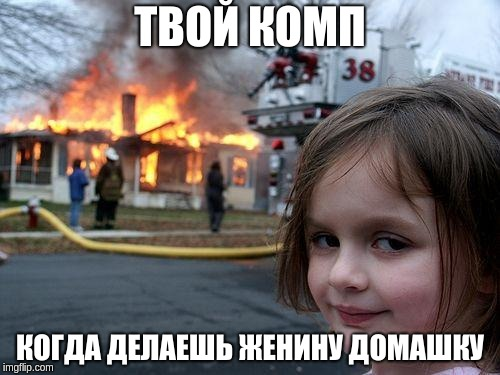

In [75]:
from IPython.display import Image
Image("memes2.jpeg")

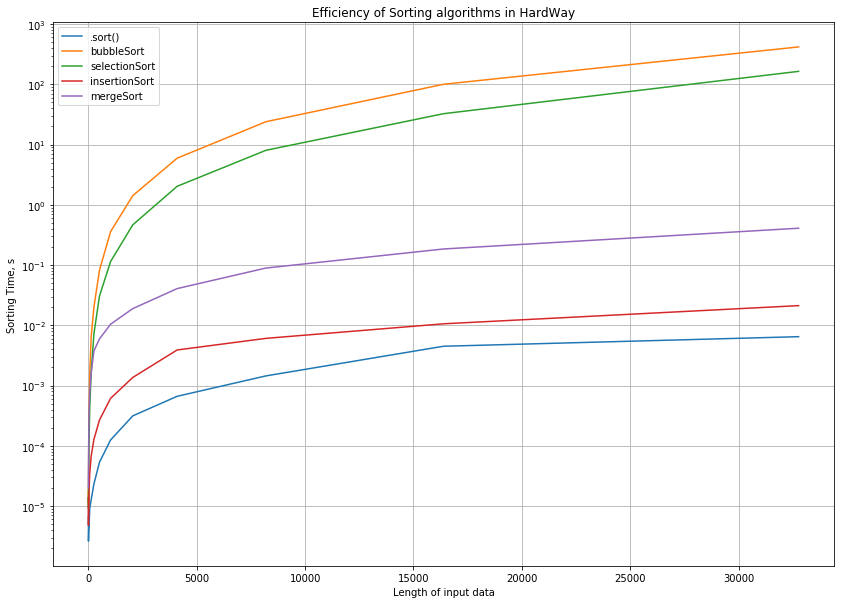

In [74]:
# Рисуем точно также, как и рисовали до этого
# Пишем код тут.....
#......
#....
#...
#..
#.
plt.show()

## Напоминаю
В ответе в гугл форме укажи самый неэффективный (самое долгое время исполнения)  алгоритм 

Ссылка на гугл-форму --- https://goo.gl/forms/rS3mp1wIa3unnxov2

И помните - лучше кодить, чем не кодить (с)